In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
annotations_dir = '/kaggle/input/MABe-mouse-behavior-detection/train_annotation'

# Use glob to find all .parquet files in all subdirectories
# The '**' tells glob to search recursively through all folders
file_paths = glob.glob(annotations_dir + '/**/*.parquet', recursive=True)

In [20]:
all_annotations_dfs = [pd.read_parquet(path) for path in file_paths]

In [26]:
annotations_df = pd.concat(all_annotations_dfs, ignore_index=True)

In [27]:
behavior_counts = annotations_df['action'].value_counts()
print("Top 10 most common behaviors:")
print(behavior_counts.head(10))

Top 10 most common behaviors:
action
sniff              37837
sniffgenital        7862
attack              7462
rear                4408
sniffbody           3518
approach            3270
sniffface           2811
mount               2747
escape              2071
reciprocalsniff     1492
Name: count, dtype: int64


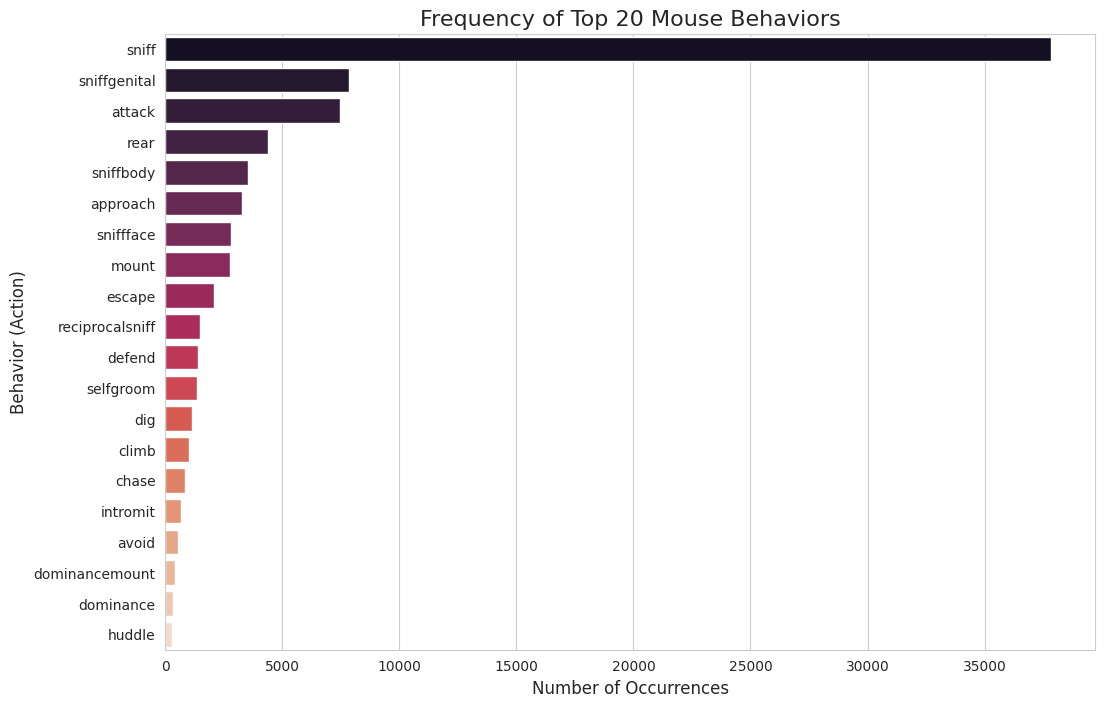

In [28]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# We'll plot the top 20 behaviors to keep the chart readable
top_20_behaviors = behavior_counts.head(20)
sns.barplot(x=top_20_behaviors.values, y=top_20_behaviors.index, palette="rocket")

plt.title('Frequency of Top 20 Mouse Behaviors', fontsize=16)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Behavior (Action)', fontsize=12)
plt.show()